# Aim 

Lift projective indecomposables (equiv., primitive idempotents) from $\mathbb{F}_3A_5$ to $\mathbb{Z}_{(3)}A_5 \subset \mathbb{Q}A_5$. 

Some character-related details are summarised below.

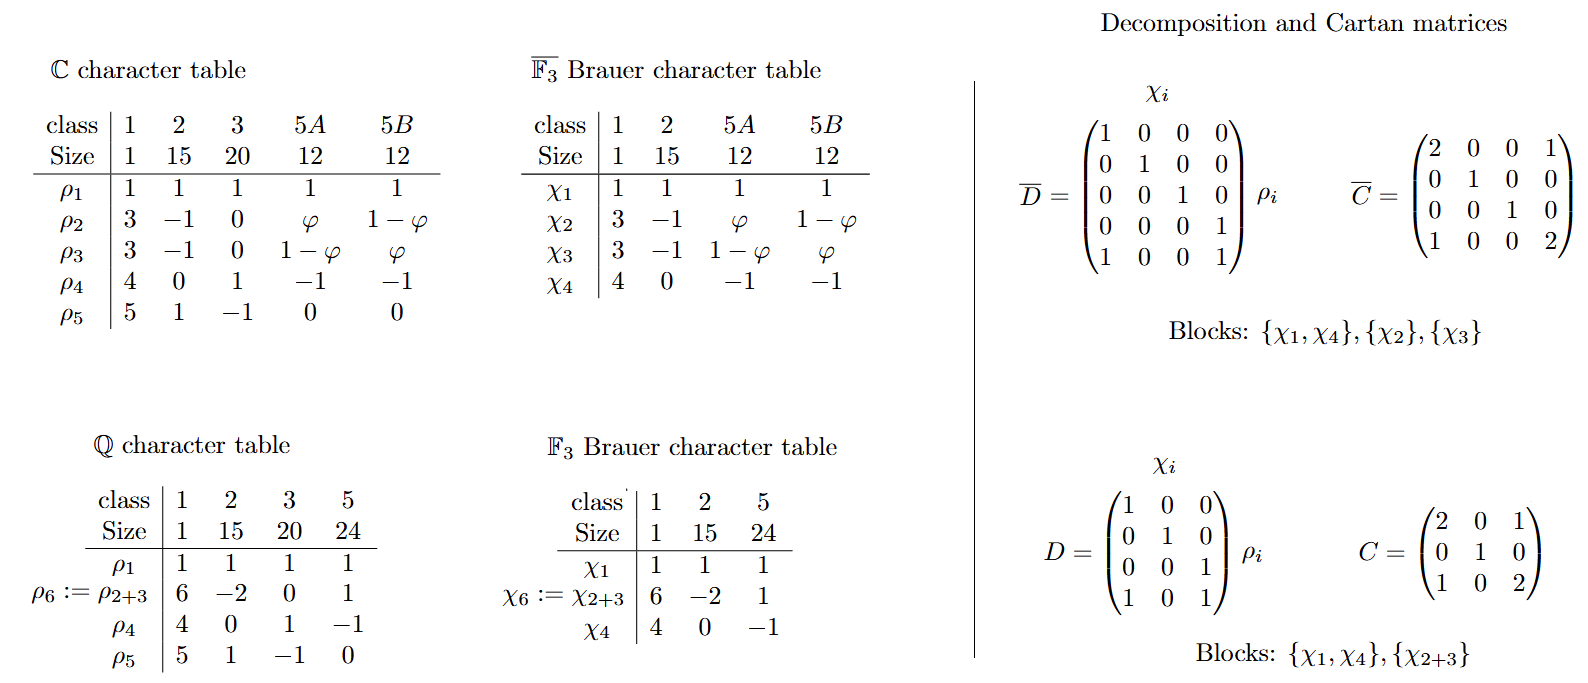

$\mathbb{F}_3A_5$ has block structure $B_0 \oplus B_1$, where $B_0$ is the principal block (containing $\chi_1$, $\chi_4$,...), and where $B_1$ is semisimple. 

- $B_0 \cong P(\chi_1) \oplus P(\chi_4)^{\oplus 4}$, where $P(-)$ denotes projective cover.
- $[P(\chi_1)] = 2[\chi_1] + [\chi_4] = 2[\rho_1] + [\rho_4] = [\rho_1] + [\rho_5]$ (projective indecomposable of dimension 6)
- $[P(\chi_4)] = [\chi_1] + 2[\chi_4] = [\rho_1] + 2[\rho_4] = [\rho_4] + [\rho_5]$  (projective indecomposable of dimension 9)
- $\dim(B_0) = 1 \times 6 + 4 \times 9 = 42$

- $B_1$ is semisimple. Indeed, $B_1 \cong P(\chi_6)^{\oplus 3} = (\chi_6)^{\oplus 3} \cong M_{3 \times 3}(\mathbb{F}_9)$.
- $\dim(B_1) = 3 \times 6 = 18$

# Quickly addressing the semisimple block, $B_1$.

Lifting $P(\chi_6) = P(\chi_2+\chi_3)$ is straightforward, as the block is semisimple. 

Using a bar, $\overline{\hspace{1ex}}$, to denote "reduction modulo 3". We have $\overline{\rho_6} = \chi_6$. 

The construction of an idempotent in $\mathbb{Q}A_5$ corresponding to $\rho_6 = \rho_2 + \rho_3$ can be achieved using Young symmetrisers (in $S_5$). We find the Young symmetriser of the $6$-dimensional irreducible representation of $S_5$, $V$ (due to the fact that $\text{Res}_{A_5}^{S_5}(V) \cong \rho_2 + \rho_3$). 

A straightforward modification of the symmetriser associated to $V$ produces the required idempotent in $A_5$. 

The details are below.

In [17]:
S5 = groups.permutation.Symmetric(5)
QS = GroupAlgebra(S5, QQ)
sgn_rep = SymmetricGroupRepresentation([1]*5)
sgn = sgn_rep.to_character()
A5 = AlternatingGroup(5)
irrA5 = A5.irreducible_characters()

'''6d rep of S_5 corresponds to tableau
[1][2][3]
[4]
[5]
'''
#compute Young symmetriser using y=ab, where a and b are the row and column (anti) symmetrisers
a6 = sum(QS(g) for g in S5.stabilizer([1,2,3],"OnSets").stabilizer(4))
b6 = sum(int(sgn(g))*QS(g) for g in S5.stabilizer([1,4,5],"OnSets").stabilizer(2))
y6 = a6*b6
f6 = 1/20*y6
assert f6**2 == f6

#required idempotent in A5 is f6 + (f6)^*, where ^* denotes replacing each [g] with sgn(g)[g] in f6
#This is equivalent to setting e6 = 2*(even terms from f6)
e6 = sum(2*coeff*QS(ele) for (ele,coeff) in f6.monomial_coefficients().items() if sgn(S5(ele)) ==1)
assert e6*e6 == e6

print(f"The idempotent is\n{e6}\n")
print(f"Its values on irreducible characters of A_5 are:\n\n{[(f"ρ{indx}", sum(coeff*char(A5(grp_ele)) for (grp_ele,coeff) in e6)) for (indx,char) in enumerate(irrA5,1)]}")

The idempotent is
1/10*() - 1/10*(2,3)(4,5) - 1/10*(1,2)(4,5) + 1/10*(1,2,3) + 1/10*(1,2,3,4,5) + 1/10*(1,2,3,5,4) - 1/10*(1,2,4) - 1/10*(1,2,5) + 1/10*(1,3,2) - 1/10*(1,3)(4,5) - 1/10*(1,3,4) - 1/10*(1,3,5) + 1/10*(1,3,2,4,5) + 1/10*(1,3,2,5,4) + 1/10*(1,4,5) - 1/10*(1,4)(2,3) + 1/10*(1,5,4) - 1/10*(1,5)(2,3)

Its values on irreducible characters of A_5 are:

[('ρ1', 0), ('ρ2', 1), ('ρ3', 1), ('ρ4', 0), ('ρ5', 0)]


# Finding primitive idempotents in the principal block, $B_0$.

Our stratgey will be to find primitive idempotents $\overline{e} \in \mathbb{F}_3A_5$. Lift them to the group ring over the $3$-adic numbers $\widehat{\mathbb{Z}_3}A_5$ (which is always possible since $\widehat{\mathbb{Z}_3}$ is complete), and then check that, in fact, the $3$-adic coefficients are rational numbers.

To do this, we need to find primitive idempotents. This is achieved as follows:

- Find $CI_1$ and $CI_0$ -- the central idempotents corresponding to the blocks $B_0$ and $B_1$, respectively. For $B_1$, this is just $CI_1 = \frac{\rho_{3}(1)}{|G|}\displaystyle \sum_{g \in G} \overline{\rho_{2+3}(g)}g$. For $B_0$, define $CI_0 = 1 - CI_1$.   
- Take subgroup $H \cong K_4 \subset A_5$, and take the idempotent in $\mathbb{Q}H \subset \mathbb{Q}A_5$ associated to trivial representation (of $H$). (The denominator will be $|K_4| = 4$, importantly, it doesn't contain any $3$s).
- Reduce modulo $3$ to obtain element of $\mathbb{F}_3H \subset \mathbb{F}_3A_5$. 
- Multiply by $CI_0$ to project to principal block. Call the resulting idempotent $\overline{x}$.
- See what we get, and go from there...

These steps are carried out below.

In [18]:
FA = GroupAlgebra(A5, GF(3))

#Central idempotent for block B1 is given by conjugacy class sums on character values of \rho_2 + \rho_3 = (6,-2,0,1,1) for classes 1,2,3,5A,5B respectively
CI_1_char_values = [6,-2,0,1,1]
conj_classes_A5 = A5.conjugacy_classes() # these classes are in the order 1,2,3,5,5, so order is compatible with above character values

CI_1 = GF(3)(3/60)*sum(val * FA(ele) for (val, ccl) in zip(CI_1_char_values,conj_classes_A5) for ele in ccl)
CI_0 = 1 - CI_1

assert CI_1**2 == CI_1
assert CI_0**2 == CI_0

g1 = A5("(1,2)(3,4)")
g2 = A5("(1,3)(2,4)")
H = A5.subgroup([g1, g2])

xbar = GF(3)(1/4)*sum(FA(ele) for ele in H) #xbar is the reduction modulo 3 of the "trivial idempotent".

assert xbar**2 == xbar
assert CI_0 * xbar == xbar #projection of xbar to principal block gives xbar. In other words, xbar is already in the principal block

We have a block decomposition of $B_0$ given by the idempotent $\overline{x}$:

$$B_0 = B_0\overline{x} \oplus B_0(CI_0 - \overline{x}) = \mathbb{F}_3A_5\overline{x} \oplus \mathbb{F}_3A_5(CI_0-\overline{x})$$

We now find dimensions of these summands. 

For a given idempotent $e$, we find the dimension of $\mathbb{F}_3A_5e$ by finding the rank of the $60 \times 60$ matrix associated to the linear transformation $L(x) = xe$, $x \in \mathbb{F}_3A_5$ with the obvious basis of $\mathbb{F}_3A_5$.

In [26]:
def Ae_matrix_rank(e, two_sided = False,return_matrix = False):
    """
    Given idempotent e, find dimension of F_3A_5e if two_sided = False, and eF_3A_5e if two_sided = True.
    If return_matrix = True, the matrix is returned, rather than its rank.
    """
    if two_sided:
        spanning_set = [e * g * e for g in A5]
    else:
        spanning_set = [g * e for g in A5]

    L_2d_array = []
    for ele in spanning_set:
        element_of_spanning_set_dict = ele.monomial_coefficients() #dict of form {'<grp_element>': <coeff>}
        coeffs_of_element_in_spanning_set = []
        for g in A5:
            try:
                coeffs_of_element_in_spanning_set.append(element_of_spanning_set_dict[g])
            except:
                coeffs_of_element_in_spanning_set.append(0)
        L_2d_array.append(coeffs_of_element_in_spanning_set)
        
    L_matrix = Matrix(GF(3), L_2d_array)
    rank_of_L_matrix = L_matrix.rank()
    if return_matrix:
        return L_matrix
    return rank_of_L_matrix

print(f"dimension of B_0(xbar) is {Ae_matrix_rank(xbar)}")
print(f"dimension of B_0(CI_0-xbar) is {Ae_matrix_rank(CI_0-xbar)}")

dimension of B_0(xbar) is 15
dimension of B_0(CI_0-xbar) is 27


- $B_0\overline{x} = \mathbb{F}_3A_5\overline{x}$ has dimension $15$, and therefore $B_0\overline{x} \cong P(\chi_1) \oplus P(\chi_4)$.

- $B_0(CI_0 - \overline{x}) = \mathbb{F}_3A_5(CI_0 - \overline{x})$ has dimension $27$, and therefore $B_0(CI_0 - \overline{x}) \cong P(\chi_4)^{\oplus 3}$. 

Moreover...

In fact, the (primitive) idempotents corresponding to $P(\chi_1)$, $P(\chi_4) \in B_0\overline{x}$ must lie in the **two sided ideal** $\overline{x}(B_0)\overline{x} = \overline{x}(\mathbb{F}_3A_5)\overline{x}$.

Indeed, a (primitive) idempotent $e$ yields a (indecomposable) module $Ae$, and $\text{End}_A(Ae) = eAe$, so $e \in \text{End}_A(Ae)$. Moreover, $\text{End}(P) \subset \text{End}(P \oplus Q)$.

Next up...

We construct a basis of $\overline{x}(\mathbb{F}_3A_5)\overline{x}$ (it turns out that dimension is 6, see below).

In [20]:
print(f"dimension of xbar(F_3A_5)xbar is {Ae_matrix_rank(xbar, two_sided = True)}\n") #dimension is 6

def coeffs_of_basis_two_sided(e):
    """
    Given idempotent e, finds coefficients of basis of eAe, where A = F_3A_5
    (ordering of coeffs follows order of [g for g in AlternatingGroup(5)])
    """
    coeff_matrix = Ae_matrix_rank(e, two_sided = True, return_matrix = True)    
    return [row for row in coeff_matrix.rref().rows() if row.is_zero() == False]

xAx_basis_coeffs = coeffs_of_basis_two_sided(xbar)
xAx_basis = [sum(coeff * FA(g) for (coeff,g) in zip(coeffs,A5)) for coeffs in xAx_basis_coeffs]

dimension of xbar(F_3A_5)xbar is 6



We have a basis of $\overline{x}(\mathbb{F}_3A_5)\overline{x}$ (of dimension $6$). There are $|\{0,1,2\}|^6 = 3^6= 729$ elements. We brute force them to find idempotents.

There will be idempotents of four types. Namely, $0$, $\overline{x}$ itself, and two other types, $\alpha$ and $\beta$ say. 

We will have $\dim(\mathbb{F}_3A_5\overline{x}) = 15$, $\dim(\mathbb{F}_3A_5\alpha) = 6$ and $\dim(\mathbb{F}_3A_5\beta) = 9$. 

Thus $\mathbb{F}_3A_5\alpha = P(\chi_1)$, $\mathbb{F}_3A_5\beta = P(\chi_4)$. In other words, idempotents of the form $\alpha$ and $\beta$ are the idempotents in $\mathbb{F}_3A_5$ we are after.

In [21]:
possible_coeffs = cartesian_product([[0,1,2]] * 6)

idempotents_in_xAx = []

for coeffs in possible_coeffs:
    test_element = sum(coeff * ele for (coeff,ele) in zip(coeffs, xAx_basis))
    if test_element**2 == test_element:
        idempotents_in_xAx.append(test_element)

#Of these idempotents, e, dim(Ae) = 0,6,9,15. Find an idempotent for dim(Ae) = 6 and 9.

idem_P1 = None
idem_P4 = None

for idem in idempotents_in_xAx:
    if (not idem_P1) and Ae_matrix_rank(idem) == 6:
       idem_P1 = idem
    if (not idem_P4) and Ae_matrix_rank(idem) == 9:
       idem_P4 = idem
    if idem_P1 and idem_P4:
        break

assert idem_P1**2 == idem_P1
assert Ae_matrix_rank(idem_P1) == 6

assert idem_P4**2 == idem_P4
assert Ae_matrix_rank(idem_P4) == 9

print(f"A primitive idempotent of F3A5 yielding the indecomposable projective P(chi_1) of dimension 6 is:\n\n{idem_P1}\n\n")
print(f"A primitive idempotent of F3A5 yielding the indecomposable projective P(chi_4) of dimension 9 is:\n\n{idem_P4}")

A primitive idempotent of F3A5 yielding the indecomposable projective P(chi_1) of dimension 6 is:

() + 2*(2,3)(4,5) + 2*(2,3,4) + 2*(2,3,5) + 2*(2,4,3) + 2*(2,5,3) + (1,2)(3,4) + 2*(1,2,3) + 2*(1,2,4,5,3) + 2*(1,2,4) + 2*(1,2,4,3,5) + 2*(1,2,5,4,3) + 2*(1,3,2) + 2*(1,3,4,5,2) + 2*(1,3,5,4,2) + 2*(1,3,4) + (1,3)(2,4) + 2*(1,3,4,2,5) + 2*(1,4,2) + 2*(1,4,3) + 2*(1,4,5) + 2*(1,4)(3,5) + (1,4)(2,3) + 2*(1,4)(2,5) + 2*(1,5,3,4,2) + 2*(1,5,4) + 2*(1,5)(2,3) + 2*(1,5,2,4,3)


A primitive idempotent of F3A5 yielding the indecomposable projective P(chi_4) of dimension 9 is:

(2,3)(4,5) + (2,3,4) + (2,3,5) + (2,4,3) + (2,5,3) + (1,2,3) + (1,2,4,5,3) + (1,2,4) + (1,2,4,3,5) + (1,2,5,4,3) + (1,3,2) + (1,3,4,5,2) + (1,3,5,4,2) + (1,3,4) + (1,3,4,2,5) + (1,4,2) + (1,4,3) + (1,4,5) + (1,4)(3,5) + (1,4)(2,5) + (1,5,3,4,2) + (1,5,4) + (1,5)(2,3) + (1,5,2,4,3)


# Lifting primitive idempotents from $\mathbb{F}_3A_5$ to $\mathbb{Z}_{(3)}A_5$

To lift, we lift to the group ring over the $3$-adic integers, $\widehat{\mathbb{Z}_3}A_5$, and then check if, in fact, our coefficients are rational. A $3$-adic integer with repeating digits is rational.

### Lifting from $\mathbb{F}_3A_5$ to $\widehat{\mathbb{Z}_3}A_5$

As $\widehat{\mathbb{Q}_3}$ (the $3$-adic numbers) are complete, it is always possible to perform such a lift. 

In practice, we lift to $\mathbb{Z}/3^c\mathbb{Z}$, which will give us the first $c$ coefficients of the lift.

As we are hoping for the coefficients to repeat  (since we work under the assumption that our $3$-adic coefficients are in fact rational), we hope to spot a repeating pattern in the first $c$ coefficients, for some reasonably small $c$.

Then, assuming repeating patterns exist (spoiler: they do). We calculate the rational coefficients and check idempotency. 

### The iterative process (how to actually lift).

- We start with any lift from $\mathbb{F}_3A_5$ to $\mathbb{Z}_{(3)}A_5 \subset \mathbb{Q}A_5$. The naive lift induced from set map $\mathbb{F}_3 \rightarrow \mathbb{Z}; \{\overline{0},\overline{1},\overline{2}\} \mapsto \{0,1,2\}$ will do. 
- Denote this initial lift by $e_0$. Then $e_0 = \bar{e}\, (\text{mod } 3)$, but $e_0$ is (almost certainly) not an idempotent.
- Iteratively define $e_{k+1} = 3e_k^2 - 2e_k^3$. 
- We have $e_{k+1}\equiv 3e_k^2 - 2e_k^3 \equiv e_k^3\, (\text{mod } 3)$. So if $e_k \equiv \bar{e}\, (\text{mod } 3)$, then $e_{k+1}$ will be too. So all the $e_i$ are lifts of $\bar{e}$.
- Define $\delta_k = e_k^2 - e_k$. This is the error/defect term (a measure of how far $e_k$ is from being idempotent).
- Claim: If $\delta_k \equiv 0\, (\text{mod } 3^n)$ then $\delta_{k+1} \equiv 0\, (\text{mod } 3^{2n})$. The proof is to show that $\delta_{k+1} = \delta_k^2(\text{stuff})$.
- Thus, $\delta_0 \equiv 0\, (\text{mod } 3^1)$, $\delta_1 \equiv 0\, (\text{mod } 3^2)$, $\delta_2 \equiv 0\, (\text{mod } 3^{2^2} = 3^4)$, $\delta_3 \equiv 0\, (\text{mod } 3^{2^3} = 3^8)$, etc
- If we work in the ring $\mathbb{Z}/3^c\mathbb{Z}$, then this iterative process stabilises after around $\log_2(c)$ iterations.


- This process will find the first $c$ $3$-adic coefficients of each element $g \in A_5$ of the lift.




In [22]:
def refine_lift(initial_lift, num_coeffs):
    c = num_coeffs
    N = 3**c
    RA = GroupAlgebra(A5,IntegerModRing(N))
    old_lift = None
    current_lift = sum(int(coeff)*RA(ele) for (ele,coeff) in initial_lift.monomial_coefficients().items())
    while current_lift != old_lift:
        old_lift = current_lift
        current_lift = 3*current_lift**2 - 2*current_lift**3
    return current_lift

def int_coeffs_to_3adic(ele_coeff_dict, num_coeffs):
    """
    Takes a dictionary with entries <str>:<int> and computes the first `num_coeffs` terms of 3-adic expansion of <int> (this is just base 3 number)
    """
    def int_to_base3(n):
        n %= 3**num_coeffs #our values will only be accurate to `num_coeffs` 3-adic places, so anything beyond 3^num_coeffs is nonsense
        expansion = ''
        for i in range(num_coeffs):
            expansion = str(n%3)+expansion
            n = n // 3
        return '...'+expansion
    expansion_dict = dict()
    for key,val in ele_coeff_dict.items():
        expansion_dict[key] = int_to_base3(int(val))
    return expansion_dict

def rational_from_repeating_3_adic(expansion:str):
    """
    Takes a 3-adic expansion (passed as a string) of the form (abcd)ef and returns the fraction it represents.
    x = (abcd)abcdef
    81x = (abcd)ef0000 (everything shifts 4 places to the left, since 81 = 3^4)
    => 80x = 3^5e+3^4f-(3^5a+3^4b+3^3c+3^2d+3e+f)
    => x = 1/80 * (3^5e+3^4f-(3^5a+3^4b+3^3c+3^2d+3e+f))
    """
    a,b,c,d,e,f = map(int,expansion[-6:])
    numerator = 3**5*e+3**4*f-(3**5*a+3**4*b+3**3*c+3**2*d+3*e+f)
    return numerator/Integer(80)

## Lifting the idempotent in $\mathbb{F}_3A_5$ associated to $P(\chi_1)$ (of dimension 6).

In [23]:
###############
# For idem_P1 #
###############

import pandas as pd


QA = GroupAlgebra(A5,QQ)
num_coeffs_of_accuracy_in_lift_refinement = 40

#obtain initial lift, refine it, then write coefficients 3-adically.
initial_lift_of_idem_P1 = sum(int(coeff)*QA(g) for (g,coeff) in idem_P1.monomial_coefficients().items())
refined_lift_of_idem_P1 = refine_lift(initial_lift_of_idem_P1, num_coeffs_of_accuracy_in_lift_refinement)
refined_lift_of_idem_P1_3_adic_coefficients = int_coeffs_to_3adic(refined_lift_of_idem_P1.monomial_coefficients(), num_coeffs_of_accuracy_in_lift_refinement)

idem_P1_lift_df = pd.DataFrame.from_dict(refined_lift_of_idem_P1_3_adic_coefficients, orient='index',columns=['3-adic coefficients'])
idem_P1_lift_df['rational_coefficients'] = idem_P1_lift_df['3-adic coefficients'].apply(rational_from_repeating_3_adic)
idem_P1_lift_df.index.name = "A5 element"

rational_lift_P1 = (idem_P1_lift_df.index.to_series().apply(lambda x: QA(x)) * idem_P1_lift_df['rational_coefficients']).sum()

#Idempotent?
assert rational_lift_P1**2 == rational_lift_P1
#Does our rational lift reduce modulo 3 to idem_P1?
assert sum(GF(3)(coeff)*FA(ele) for (ele,coeff) in rational_lift_P1.monomial_coefficients().items()) == idem_P1

print(f"Rational idempotent associated to rational lift of P(chi_1) (of dimension 6) is\n\n{rational_lift_P1}\n\n")
print(f"A dataframe displaying 3-adic coefficients, as well as rational coefficients for each term in the rational lift:\n\n{idem_P1_lift_df}\n")

Rational idempotent associated to rational lift of P(chi_1) (of dimension 6) is

1/10*() + 3/80*(3,4,5) + 3/80*(3,5,4) - 1/40*(2,3)(4,5) - 1/40*(2,3,4) - 1/40*(2,3,5) - 1/40*(2,4,3) + 3/80*(2,4,5) + 3/80*(2,4)(3,5) - 1/40*(2,5,3) + 3/80*(2,5,4) + 3/80*(2,5)(3,4) + 3/80*(1,2)(4,5) + 1/10*(1,2)(3,4) + 3/80*(1,2)(3,5) - 1/40*(1,2,3) + 3/80*(1,2,3,4,5) + 3/80*(1,2,3,5,4) - 1/40*(1,2,4,5,3) - 1/40*(1,2,4) - 1/40*(1,2,4,3,5) - 1/40*(1,2,5,4,3) + 3/80*(1,2,5) + 3/80*(1,2,5,3,4) - 1/40*(1,3,2) - 1/40*(1,3,4,5,2) - 1/40*(1,3,5,4,2) + 3/80*(1,3)(4,5) - 1/40*(1,3,4) + 3/80*(1,3,5) + 1/10*(1,3)(2,4) + 3/80*(1,3,2,4,5) + 3/80*(1,3,5,2,4) + 3/80*(1,3)(2,5) + 3/80*(1,3,2,5,4) - 1/40*(1,3,4,2,5) + 3/80*(1,4,5,3,2) - 1/40*(1,4,2) + 3/80*(1,4,3,5,2) - 1/40*(1,4,3) - 1/40*(1,4,5) - 1/40*(1,4)(3,5) + 3/80*(1,4,5,2,3) + 1/10*(1,4)(2,3) + 3/80*(1,4,2,3,5) + 3/80*(1,4,2,5,3) + 3/80*(1,4,3,2,5) - 1/40*(1,4)(2,5) + 3/80*(1,5,4,3,2) + 3/80*(1,5,2) - 1/40*(1,5,3,4,2) + 3/80*(1,5,3) - 1/40*(1,5,4) + 3/80*(1,5)(3,

## Lifting the idempotent in $\mathbb{F}_3A_5$ associated to $P(\chi_4)$ (of dimension 9).

In [24]:
###############
# For idem_P4 #
###############

#obtain initial lift, refine it, then write coefficients 3-adically.
initial_lift_of_idem_P4 = sum(int(coeff)*QA(g) for (g,coeff) in idem_P4.monomial_coefficients().items())
refined_lift_of_idem_P4 = refine_lift(initial_lift_of_idem_P4, num_coeffs_of_accuracy_in_lift_refinement)
refined_lift_of_idem_P4_3_adic_coefficients = int_coeffs_to_3adic(refined_lift_of_idem_P4.monomial_coefficients(), num_coeffs_of_accuracy_in_lift_refinement)

idem_P4_lift_df = pd.DataFrame.from_dict(refined_lift_of_idem_P4_3_adic_coefficients, orient='index',columns=['3-adic coefficients'])
idem_P4_lift_df['rational_coefficients'] = idem_P4_lift_df['3-adic coefficients'].apply(rational_from_repeating_3_adic)
idem_P4_lift_df.index.name = "A5 element"

rational_lift_P4 = (idem_P4_lift_df.index.to_series().apply(lambda x: QA(x)) * idem_P4_lift_df['rational_coefficients']).sum()

#Idempotent?
assert rational_lift_P4**2 == rational_lift_P4
#Does our rational lift reduce modulo 3 to idem_P4?
assert sum(GF(3)(coeff)*FA(ele) for (ele,coeff) in rational_lift_P4.monomial_coefficients().items()) == idem_P4

print(f"Rational idempotent associated to rational lift of P(chi_4) (of dimension 9) is\n\n{rational_lift_P4}\n\n")
print(f"A dataframe displaying 3-adic coefficients, as well as rational coefficients for each term in the rational lift:\n\n{idem_P4_lift_df}\n")

Rational idempotent associated to rational lift of P(chi_4) (of dimension 9) is

3/20*() - 3/80*(3,4,5) - 3/80*(3,5,4) + 1/40*(2,3)(4,5) + 1/40*(2,3,4) + 1/40*(2,3,5) + 1/40*(2,4,3) - 3/80*(2,4,5) - 3/80*(2,4)(3,5) + 1/40*(2,5,3) - 3/80*(2,5,4) - 3/80*(2,5)(3,4) - 3/80*(1,2)(4,5) + 3/20*(1,2)(3,4) - 3/80*(1,2)(3,5) + 1/40*(1,2,3) - 3/80*(1,2,3,4,5) - 3/80*(1,2,3,5,4) + 1/40*(1,2,4,5,3) + 1/40*(1,2,4) + 1/40*(1,2,4,3,5) + 1/40*(1,2,5,4,3) - 3/80*(1,2,5) - 3/80*(1,2,5,3,4) + 1/40*(1,3,2) + 1/40*(1,3,4,5,2) + 1/40*(1,3,5,4,2) - 3/80*(1,3)(4,5) + 1/40*(1,3,4) - 3/80*(1,3,5) + 3/20*(1,3)(2,4) - 3/80*(1,3,2,4,5) - 3/80*(1,3,5,2,4) - 3/80*(1,3)(2,5) - 3/80*(1,3,2,5,4) + 1/40*(1,3,4,2,5) - 3/80*(1,4,5,3,2) + 1/40*(1,4,2) - 3/80*(1,4,3,5,2) + 1/40*(1,4,3) + 1/40*(1,4,5) + 1/40*(1,4)(3,5) - 3/80*(1,4,5,2,3) + 3/20*(1,4)(2,3) - 3/80*(1,4,2,3,5) - 3/80*(1,4,2,5,3) - 3/80*(1,4,3,2,5) + 1/40*(1,4)(2,5) - 3/80*(1,5,4,3,2) - 3/80*(1,5,2) + 1/40*(1,5,3,4,2) - 3/80*(1,5,3) + 1/40*(1,5,4) - 3/80*(1,5)(3,

## Checking dimensions (A sanity check).

In [25]:
"""
We have seen this function before, namely `Ae_matrix_rank` (but here the matrix is over QQ, rather than F_3).
Rather than create a distraction by adding another argument in the prior version of the function, we just redefine it... 
"""
def dimQA5e(e):
    """
    Given idempotent e, find the dimension of QA_5e
    """
    spanning_set = [g * e for g in A5]
    L_2d_array = []
    for ele in spanning_set:
        element_of_spanning_set_dict = ele.monomial_coefficients() #dict of form {'<grp_element>': <coeff>}
        coeffs_of_element_in_spanning_set = []
        for g in A5:
            try:
                coeffs_of_element_in_spanning_set.append(element_of_spanning_set_dict[g])
            except:
                coeffs_of_element_in_spanning_set.append(0)
        L_2d_array.append(coeffs_of_element_in_spanning_set)        
    L_matrix = Matrix(QQ, L_2d_array)
    rank_of_L_matrix = L_matrix.rank()
    return rank_of_L_matrix

print(f"The dimension of QA_5*(rational_lift_P1) as a Q-vector space is {dimQA5e(rational_lift_P1)}\n")
print(f"The dimension of QA_5*(rational_lift_P4) as a Q-vector space is {dimQA5e(rational_lift_P4)}")

The dimension of QA_5*(rational_lift_P1) as a Q-vector space is 6

The dimension of QA_5*(rational_lift_P4) as a Q-vector space is 9
